# **Kaggle – DataTops®**
Tu TA ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a tu profe a mejorar ese modelo?

## Aspectos importantes
- Última submission:
    - Mañana: 17 de febrero a las 5pm
    - Tarde: 19 de febrero a las 5pm
- **Enlace de la competición**: https://www.kaggle.com/t/c5cc87b50c4b4770bdc8f5acbe15577d
- **Requisito**: Estar registrado en [Kaggle](https://www.kaggle.com/)

## Métrica:
El error cuadrático medio (RMSE, por sus siglas en inglés) es una medida de la desviación estándar de los residuos (errores de predicción). Los residuos representan la diferencia entre los valores observados y los valores predichos por el modelo. El RMSE indica qué tan dispersos están estos errores: cuanto menor es el RMSE, más cercanas están las predicciones a los valores reales. En otras palabras, el RMSE mide qué tan bien se ajusta la línea de regresión a los datos.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## 1. Librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
from PIL import Image
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import urllib.request

import toolbox_ML as tb
import bootcampviztools as bt

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler

pd.options.mode.copy_on_write = True

## 2. Datos

In [2]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle
df = pd.read_csv("./data/train.csv", index_col = "laptop_ID")
df.index.name = None

In [3]:
df_copy = df.copy()

### 2.1 Exploración de los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [5]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [6]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [7]:
df.describe()

,Inches,Price_in_euros
count,912.000000,912.000000
mean,14.981579,1111.724090
std,1.436719,687.959172
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,978.000000
75%,15.600000,1483.942500
max,18.400000,6099.000000


In [8]:
tb.describe_df(df)

COL_N,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
DATA_TYPE,object,object,object,float64,object,object,object,object,object,object,object,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,19,480,6,17,36,107,9,37,93,9,165,603
CARDIN (%),2.08,52.63,0.66,1.86,3.95,11.73,0.99,4.06,10.2,0.99,18.09,66.12


In [9]:
# La columna Product me la quito, mucha cardinalidad y no me aporta mucha información
df = df.drop(columns= "Product")

In [10]:
# Weight --> Numérica
# Ram y Weight --> Numéricas
df["Ram"] = df["Ram"].str.replace("GB","").astype(int)

df["Weight"] = df["Weight"].str.replace("kg", "").astype(float)

In [11]:
df["Company"].unique()

array(['HP', 'Dell', 'Apple', 'Lenovo', 'MSI', 'Toshiba', 'Acer', 'Chuwi',
       'Asus', 'Huawei', 'Razer', 'Mediacom', 'Google', 'Samsung',
       'Xiaomi', 'Microsoft', 'Vero', 'LG', 'Fujitsu'], dtype=object)

In [12]:
df["TypeName"].unique()

array(['Notebook', 'Gaming', 'Ultrabook', 'Workstation', 'Netbook',
       '2 in 1 Convertible'], dtype=object)

In [13]:
df["ScreenResolution"].unique()

array(['Full HD 1920x1080', '1440x900', '1366x768',
       'IPS Panel Full HD 1920x1080', 'IPS Panel 4K Ultra HD 3840x2160',
       'IPS Panel Retina Display 2560x1600', 'Touchscreen 1366x768',
       'IPS Panel Quad HD+ 2560x1440', 'IPS Panel 1366x768',
       'Full HD / Touchscreen 1920x1080', 'IPS Panel Full HD 2160x1440',
       'Quad HD+ 3200x1800', '4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'IPS Panel Touchscreen 1920x1200',
       'IPS Panel Touchscreen 2560x1440', 'Touchscreen 2400x1600',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2560x1440', 'Quad HD+ / Touchscreen 3200x1800',
       '4K Ultra HD 3840x2160',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'Touchscreen 2256x1504', '1600x900',
       'IPS Panel Touchscreen 1366x768',
       'Touchscreen / Quad HD+ 3200x1800', 'IPS Panel 2560x1440',
       'IPS Panel Quad HD+ 3200x

"Retina Display" --> Apple

Simplifico ScreenResolution creando nuevas columnas:
- pixels: ancho x altura --> int (en megapíxeles)
- touchscreen --> binaria
- IPS_panel --> binaria

In [13]:
lista_pixeles = []
lista_touchscreen = []
lista_ips_panel = []

for string in df["ScreenResolution"].values:
    ancho, altura = re.findall(r"\d{3,4}", string)
    pixeles = int(ancho)*int(altura) / 1_000_000 # en megapíxeles
    lista_pixeles.append(pixeles)

    lista_touchscreen.append(int(("Touchscreen" in string)))

    lista_ips_panel.append(int(("IPS" in string)))

df["pixels"] = lista_pixeles
df["touchscreen"] = lista_touchscreen
df["IPS_panel"] = lista_ips_panel
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,pixels,touchscreen,IPS_panel
755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,539.00,2.073600,0,0
618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,879.01,2.073600,0,0
909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,900.00,2.073600,0,0
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.296000,0,0
286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,428.00,2.073600,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,800.00,2.073600,0,0
1160,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,1629.00,2.073600,1,0
78,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,No OS,2.20,519.00,2.073600,0,0
23,HP,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,No OS,1.86,258.00,1.049088,0,0


In [14]:
columns_to_exclude = ["ScreenResolution"]

In [15]:
df["Cpu"].unique()

array(['Intel Core i3 6006U 2GHz', 'Intel Core i7 6700HQ 2.6GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i3 6006U 2.0GHz', 'Intel Core i5 7300U 2.6GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i3 7100U 2.4GHz',
       'Intel Core i7 7700HQ 2.8GHz', 'Intel Core i7 7600U 2.8GHz',
       'Intel Core i5 2.9GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Core i7 6500U 2.5GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Celeron Quad Core N3710 1.6GHz',
       'Intel Celeron Dual Core N3060 1.6GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'Intel Pentium Quad Core N3710 1.6GHz',
       'Intel Core i5 6200U 2.3GHz', 'Intel Core i5 8250U 1.6GHz',
       'AMD Ryzen 1700 3GHz', 'Intel Core i7 7820HK 2.9GHz',
       'Intel Core i5 1.3GHz', 'Intel Pentium Quad Core N3700 1.6GHz',
       'AMD A9-Series A9-9420 3GHz', 'Intel Core i7 7560U 2.4GHz',
       'Intel Core i

In [16]:
lista_intel = []
for string in df["Cpu"].unique():
    if string.startswith("Intel"):
        lista_intel.append(string)
lista_intel

['Intel Core i3 6006U 2GHz',
 'Intel Core i7 6700HQ 2.6GHz',
 'Intel Core i7 7500U 2.7GHz',
 'Intel Core i5 1.8GHz',
 'Intel Core i3 6006U 2.0GHz',
 'Intel Core i5 7300U 2.6GHz',
 'Intel Core i5 7200U 2.5GHz',
 'Intel Core i3 7100U 2.4GHz',
 'Intel Core i7 7700HQ 2.8GHz',
 'Intel Core i7 7600U 2.8GHz',
 'Intel Core i5 2.9GHz',
 'Intel Core i7 8550U 1.8GHz',
 'Intel Pentium Quad Core N4200 1.1GHz',
 'Intel Core i7 6500U 2.5GHz',
 'Intel Core i7 8650U 1.9GHz',
 'Intel Celeron Quad Core N3710 1.6GHz',
 'Intel Celeron Dual Core N3060 1.6GHz',
 'Intel Atom x5-Z8300 1.44GHz',
 'Intel Core i5 7300HQ 2.5GHz',
 'Intel Pentium Quad Core N3710 1.6GHz',
 'Intel Core i5 6200U 2.3GHz',
 'Intel Core i5 8250U 1.6GHz',
 'Intel Core i7 7820HK 2.9GHz',
 'Intel Core i5 1.3GHz',
 'Intel Pentium Quad Core N3700 1.6GHz',
 'Intel Core i7 7560U 2.4GHz',
 'Intel Core i7 6600U 2.6GHz',
 'Intel Celeron Dual Core 3855U 1.6GHz',
 'Intel Atom x5-Z8550 1.44GHz',
 'Intel Core i5 3.1GHz',
 'Intel Celeron Dual Core N335

In [17]:
lista_AMD = []
for string in df["Cpu"].unique():
    if string.startswith("AMD"):
        lista_AMD.append(string)
lista_AMD

['AMD Ryzen 1700 3GHz',
 'AMD A9-Series A9-9420 3GHz',
 'AMD FX 9830P 3GHz',
 'AMD A6-Series 9220 2.9GHz',
 'AMD A12-Series 9720P 3.6GHz',
 'AMD E-Series 7110 1.8GHz',
 'AMD A9-Series 9420 3GHz',
 'AMD A9-Series 9410 2.9GHz',
 'AMD E-Series E2-9000e 1.5GHz',
 'AMD A8-Series 7410 2.2GHz',
 'AMD E-Series 6110 1.5GHz',
 'AMD E-Series 9000e 1.5GHz',
 'AMD E-Series E2-6110 1.5GHz',
 'AMD A10-Series 9600P 2.4GHz',
 'AMD E-Series E2-9000 2.2GHz',
 'AMD A6-Series 9220 2.5GHz',
 'AMD A6-Series A6-9220 2.5GHz',
 'AMD A9-Series 9420 2.9GHz',
 'AMD A10-Series A10-9620P 2.5GHz',
 'AMD A12-Series 9720P 2.7GHz',
 'AMD A10-Series 9620P 2.5GHz',
 'AMD Ryzen 1600 3.2GHz',
 'AMD A6-Series 7310 2GHz']

In [ ]:
# compruebo que solo hay Intel y AMD
len(lista_intel) + len(lista_AMD) == len(df["Cpu"].unique())

True

Cada valor de Cpu contiene marca-familia-modelo exacto-frecuencia.

Voy a dividir en familia y frecuencia.

- Intel --> Atom, Core M, Celeron, Pentium, i3, i5, i7, Xeon

- AMD --> E-Series, A-Series, FX, Ryzen

In [19]:
familias_cpu = []
frecuencias_cpu = []

for string in df["Cpu"].values:
    string = string.lower()

    frecuencia = float(re.search(r"(\d+(?:\.\d+)?)ghz", string)[1])
    frecuencias_cpu.append(frecuencia)

    if "atom" in string:
      familias_cpu.append("Atom")
    elif "core m" in string:
      familias_cpu.append("Core M")
    elif "celeron" in string:
      familias_cpu.append("Celeron")
    elif "pentium" in string:
      familias_cpu.append("Pentium")
    elif "i3" in string:
      familias_cpu.append("i3")
    elif "i5" in string:
      familias_cpu.append("i5")
    elif "i7" in string:
      familias_cpu.append("i7")
    elif "e-series" in string:
      familias_cpu.append("E-Series")
    elif "fx" in string:
      familias_cpu.append("FX")
    elif "ryzen" in string:
      familias_cpu.append("Ryzen")
    else:
      familias_cpu.append("A-Series")

df["familias_cpu"] = familias_cpu
df["frecuencia_cpu"] = frecuencias_cpu
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,pixels,touchscreen,IPS_panel,familias_cpu,frecuencia_cpu
755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,539.00,2.0736,0,0,i3,2.0
618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,879.01,2.0736,0,0,i7,2.6
909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,900.00,2.0736,0,0,i7,2.7
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.2960,0,0,i5,1.8
286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,428.00,2.0736,0,0,i3,2.0


In [20]:
columns_to_exclude.append("Cpu")

In [21]:
df["Memory"].unique()

array(['256GB SSD', '1TB HDD', '128GB Flash Storage',
       '128GB SSD +  1TB HDD', '512GB SSD', '500GB HDD',
       '256GB SSD +  256GB SSD', '128GB SSD', '32GB Flash Storage',
       '64GB Flash Storage', '1.0TB Hybrid', '2TB HDD',
       '256GB Flash Storage', '256GB SSD +  1TB HDD', '180GB SSD',
       '16GB Flash Storage', '1TB SSD', '256GB SSD +  2TB HDD',
       '32GB SSD', '1TB SSD +  1TB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  1TB HDD', '512GB SSD +  512GB SSD',
       '512GB SSD +  256GB SSD', '16GB SSD',
       '64GB Flash Storage +  1TB HDD', '64GB SSD', '128GB HDD',
       '240GB SSD', '512GB SSD +  2TB HDD', '508GB Hybrid', '8GB SSD',
       '256GB SSD +  500GB HDD', '1.0TB HDD', '512GB Flash Storage',
       '1TB HDD +  1TB HDD', '32GB HDD'], dtype=object)

Separo Memory en capacidad de almacenamiento total (en GB) y en las binarias SSD, HDD, Flash e Hybrid.

In [22]:
def tb_a_gb(patron):
    '''
    Convierte terabytes a gigabytes
    '''
    numero = float(patron[1])

    numero_gb = int(numero*1000) # 1TB = 1000GB
    return f"{numero_gb}GB"

In [23]:
total_capacity_memory = []
ssd = []
hdd = []
flash = []
hybrid = []

for string in df["Memory"].values:
    string = re.sub(r"(\d+(?:\.\d+)?)TB", tb_a_gb, string) # Primero convierto los terabytes a gigabytes. Si no hay TB lo deja igual
      
    capacities_str = re.findall(r"(\d+(?:\.\d+)?)", string)
    capacities_num = [int(x) for x in capacities_str]
    total_capacity_memory.append(sum(capacities_num))

    string = string.lower()

    ssd.append(int(("ssd" in string)))
      
    hdd.append(int(("hdd" in string)))

    flash.append(int(("flash" in string)))

    hybrid.append(int(("hybrid" in string)))

df["total_capacity_memory"] = total_capacity_memory
df["SSD"] = ssd
df["HDD"] = hdd
df["Flash_storage"] = flash
df["Hybrid"] = hybrid
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,pixels,touchscreen,IPS_panel,familias_cpu,frecuencia_cpu,total_capacity_memory,SSD,HDD,Flash_storage,Hybrid
755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,...,2.0736,0,0,i3,2.0,256,1,0,0,0
618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,...,2.0736,0,0,i7,2.6,1000,0,1,0,0
909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,...,2.0736,0,0,i7,2.7,1000,0,1,0,0
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1.2960,0,0,i5,1.8,128,0,0,1,0
286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,...,2.0736,0,0,i3,2.0,1000,0,1,0,0


In [24]:
columns_to_exclude.append("Memory")

In [25]:
df["OpSys"].unique()

array(['Windows 10', 'macOS', 'Linux', 'No OS', 'Chrome OS', 'Windows 7',
       'Android', 'Windows 10 S', 'Mac OS X'], dtype=object)

In [26]:
op_sys = []

for string in df["OpSys"].values:
    string = string.lower()

    if "windows" in string:
      op_sys.append("Windows")
    elif "mac" in string:
      op_sys.append("MacOs")
    elif "no os" in string:
      op_sys.append("No OS")
    else:
      op_sys.append("Otro")

df["OpSys"] = op_sys
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,pixels,touchscreen,IPS_panel,familias_cpu,frecuencia_cpu,total_capacity_memory,SSD,HDD,Flash_storage,Hybrid
755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows,1.86,...,2.0736,0,0,i3,2.0,256,1,0,0,0
618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows,2.59,...,2.0736,0,0,i7,2.6,1000,0,1,0,0
909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows,2.04,...,2.0736,0,0,i7,2.7,1000,0,1,0,0
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,MacOs,1.34,...,1.2960,0,0,i5,1.8,128,0,0,1,0
286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Otro,2.25,...,2.0736,0,0,i3,2.0,1000,0,1,0,0


In [27]:
df["Gpu"].unique()

array(['Intel HD Graphics 520', 'Nvidia GeForce GTX 960<U+039C>',
       'Nvidia GeForce 930MX', 'Intel HD Graphics 6000',
       'AMD Radeon R5 M430', 'Intel HD Graphics 620',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050 Ti',
       'Intel Iris Graphics 550', 'Intel HD Graphics 505',
       'Intel UHD Graphics 620', 'Intel HD Graphics 405',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce GTX 960M',
       'Intel HD Graphics 400', 'AMD Radeon R7 M445',
       'AMD Radeon R7 M460', 'Intel HD Graphics', 'AMD FirePro W6150M',
       'Nvidia GeForce GTX 1050', 'Nvidia Quadro M1200',
       'AMD Radeon RX 580', 'Nvidia GeForce GTX 1080',
       'AMD Radeon R5 M330', 'Nvidia GeForce GTX 1070',
       'Intel HD Graphics 615', 'AMD Radeon 530', 'AMD Radeon 520',
       'Nvidia Quadro M620', 'Intel Iris Plus Graphics 640',
       'Nvidia Quadro M500M', 'Intel HD Graphics 510',
       'Intel Iris Plus Graphics 650', 'Nvidia GeForce 920MX ',
       'Intel HD Graphics 500', 'AMD Radeo

Me quedo solo con la marca

In [28]:
marcas_gpu = []

for string in df["Gpu"].values:
    string = string.lower()

    if "intel" in string:
      marcas_gpu.append("Intel")
    elif "amd" in string:
      marcas_gpu.append("AMD")
    else:
      marcas_gpu.append("Nvidia")

df["marca_Gpu"] = marcas_gpu
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,touchscreen,IPS_panel,familias_cpu,frecuencia_cpu,total_capacity_memory,SSD,HDD,Flash_storage,Hybrid,marca_Gpu
755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows,1.86,...,0,0,i3,2.0,256,1,0,0,0,Intel
618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows,2.59,...,0,0,i7,2.6,1000,0,1,0,0,Nvidia
909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows,2.04,...,0,0,i7,2.7,1000,0,1,0,0,Nvidia
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,MacOs,1.34,...,0,0,i5,1.8,128,0,0,1,0,Intel
286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Otro,2.25,...,0,0,i3,2.0,1000,0,1,0,0,AMD


In [29]:
columns_to_exclude.append("Gpu")

In [30]:
columns_to_exclude

['ScreenResolution', 'Cpu', 'Memory', 'Gpu']

In [31]:
df = df.drop(columns= columns_to_exclude, axis = 1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company                912 non-null    object 
 1   TypeName               912 non-null    object 
 2   Inches                 912 non-null    float64
 3   Ram                    912 non-null    int32  
 4   OpSys                  912 non-null    object 
 5   Weight                 912 non-null    float64
 6   Price_in_euros         912 non-null    float64
 7   pixels                 912 non-null    float64
 8   touchscreen            912 non-null    int64  
 9   IPS_panel              912 non-null    int64  
 10  familias_cpu           912 non-null    object 
 11  frecuencia_cpu         912 non-null    float64
 12  total_capacity_memory  912 non-null    int64  
 13  SSD                    912 non-null    int64  
 14  HDD                    912 non-null    int64  
 15  Flash_sto

**Análisis target**

In [33]:
target = "Price_in_euros"

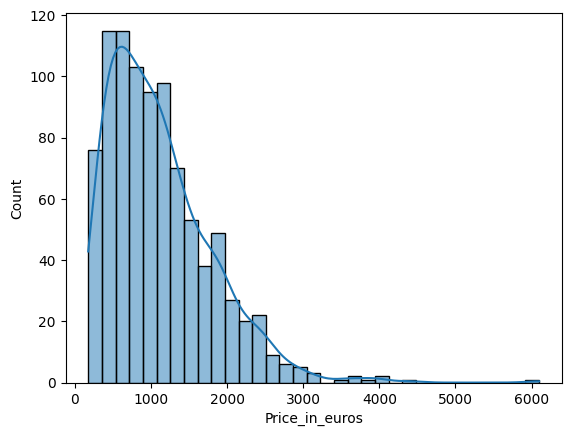

In [34]:
sns.histplot(df[target], kde = True);

Tiene una distribución logarítmica.

### 2.3 División Train y Test

In [35]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

**Mini EDA**

In [36]:
train_set.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_in_euros,pixels,touchscreen,IPS_panel,familias_cpu,frecuencia_cpu,total_capacity_memory,SSD,HDD,Flash_storage,Hybrid,marca_Gpu
1118,HP,Workstation,17.3,8,Windows,3.00,2899.00,2.0736,0,1,i7,2.6,1000,0,1,0,0,AMD
153,Dell,Gaming,15.6,16,Windows,2.56,1249.26,2.0736,0,0,i7,2.8,512,1,0,0,0,Nvidia
275,Apple,Ultrabook,13.3,8,MacOs,1.37,1958.90,4.0960,0,1,i5,2.9,512,1,0,0,0,Intel
1100,HP,Notebook,14.0,4,Windows,1.54,1030.99,2.0736,0,0,i5,2.3,500,0,1,0,0,Intel
131,Dell,Notebook,17.3,16,Windows,2.80,1396.00,2.0736,0,0,i7,1.8,2256,1,1,0,0,AMD


In [37]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight',
       'Price_in_euros', 'pixels', 'touchscreen', 'IPS_panel', 'familias_cpu',
       'frecuencia_cpu', 'total_capacity_memory', 'SSD', 'HDD',
       'Flash_storage', 'Hybrid', 'marca_Gpu'],
      dtype='object')

In [38]:
features_num = ['Inches', 'Ram', 'Weight', 'pixels', 'frecuencia_cpu',  'total_capacity_memory']
print(features_num)

features_cat = [col for col in train_set.columns if col != target and col not in features_num]
print(features_cat)

['Inches', 'Ram', 'Weight', 'pixels', 'frecuencia_cpu', 'total_capacity_memory']
['Company', 'TypeName', 'OpSys', 'touchscreen', 'IPS_panel', 'familias_cpu', 'SSD', 'HDD', 'Flash_storage', 'Hybrid', 'marca_Gpu']


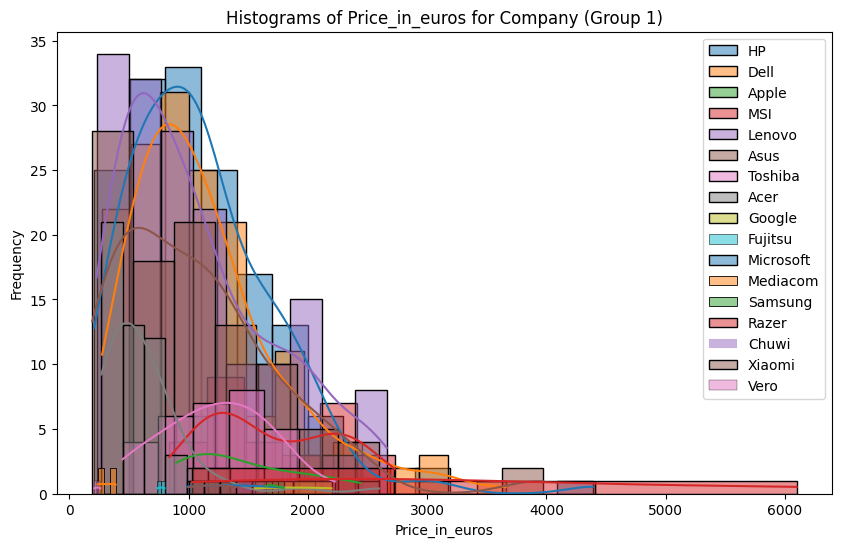

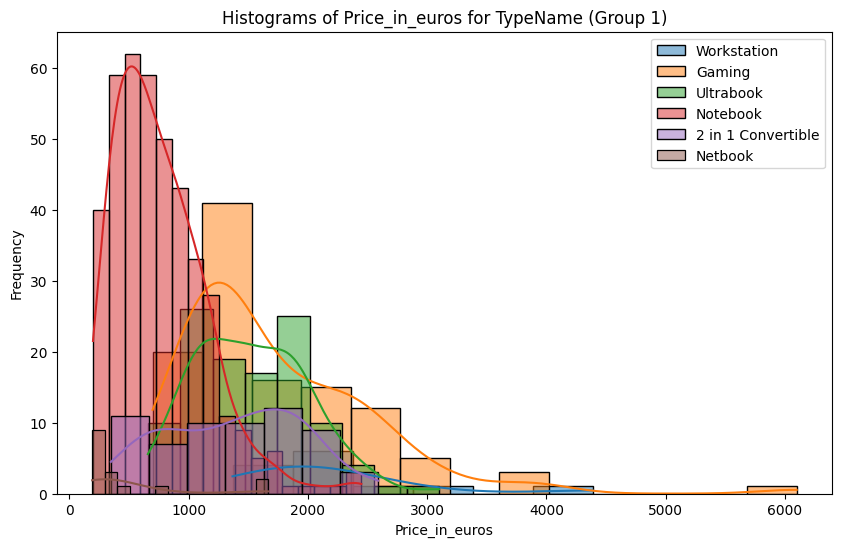

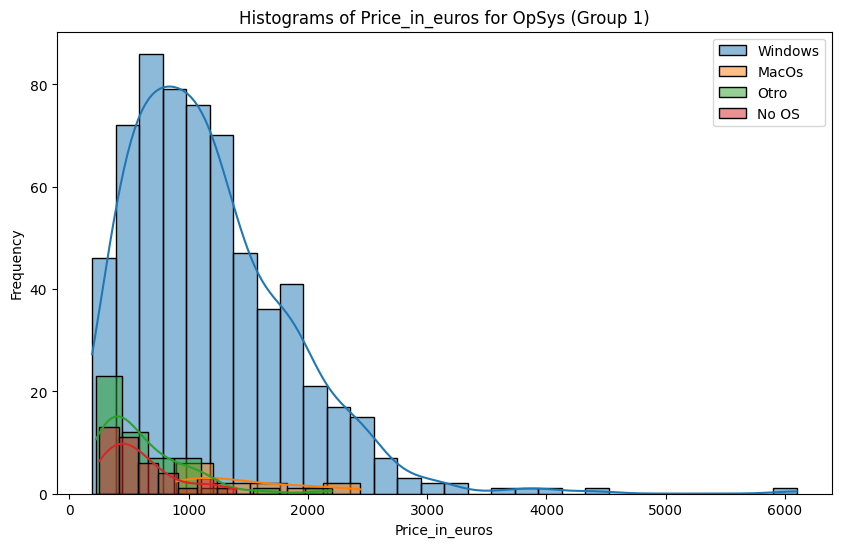

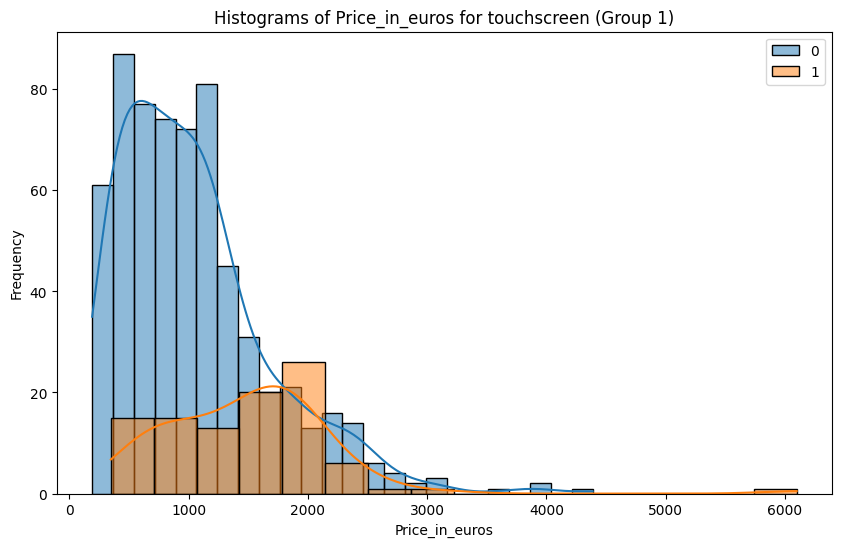

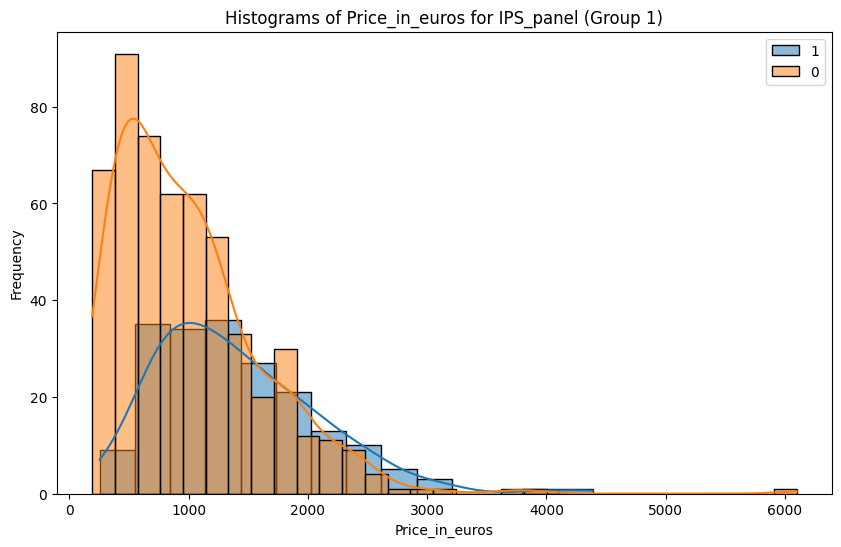

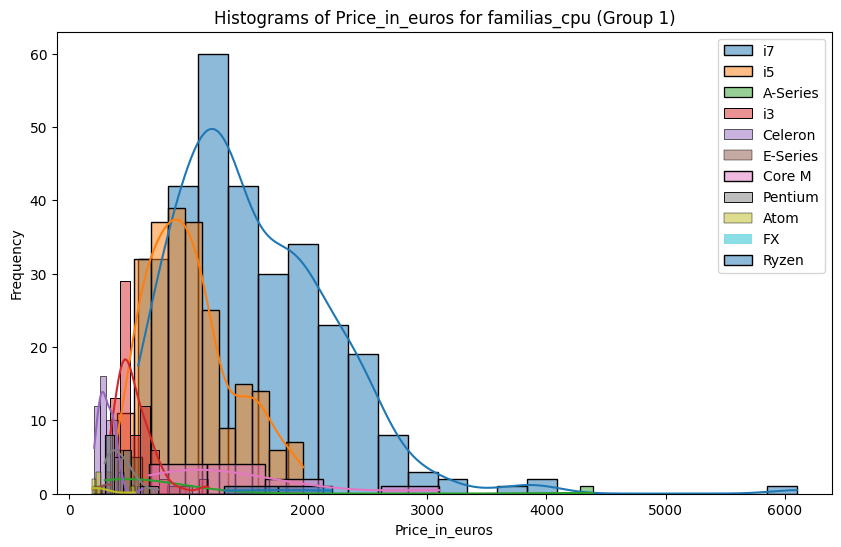

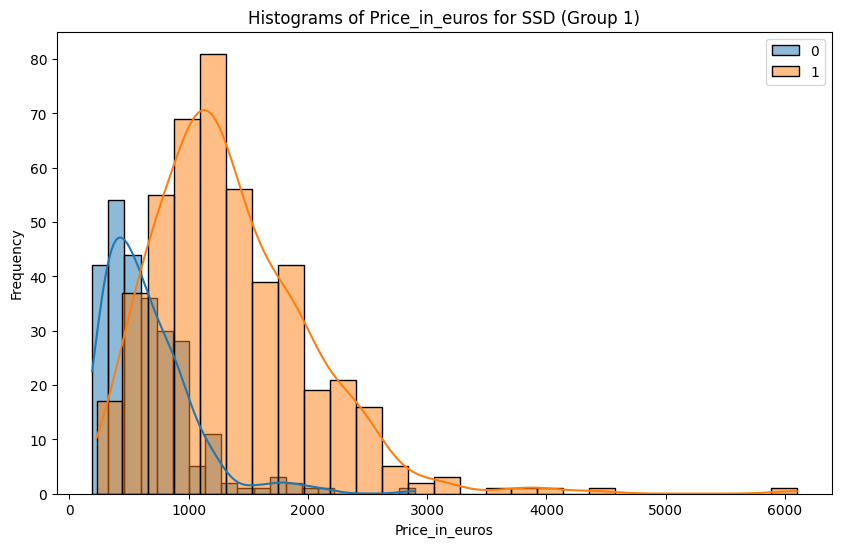

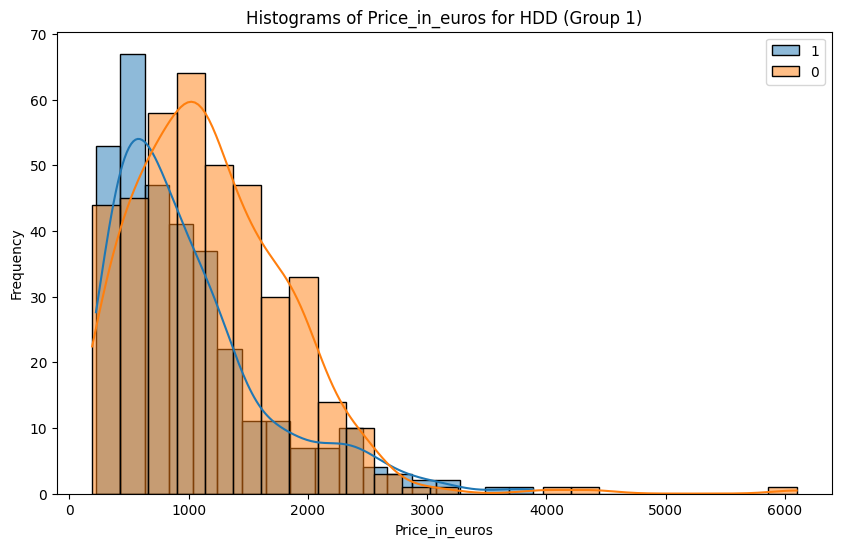

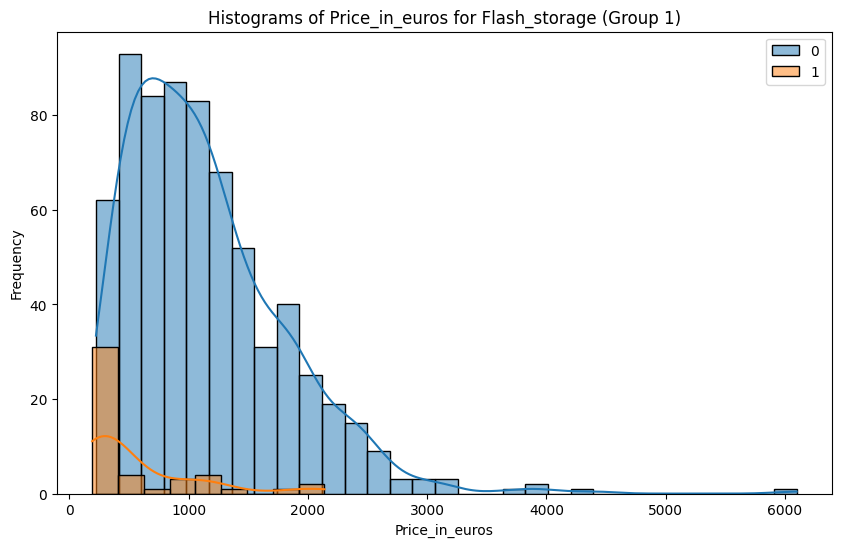

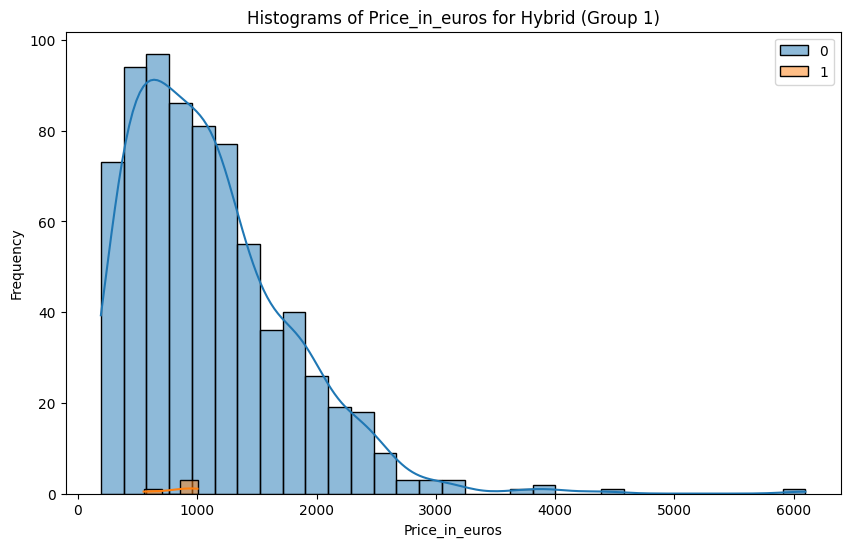

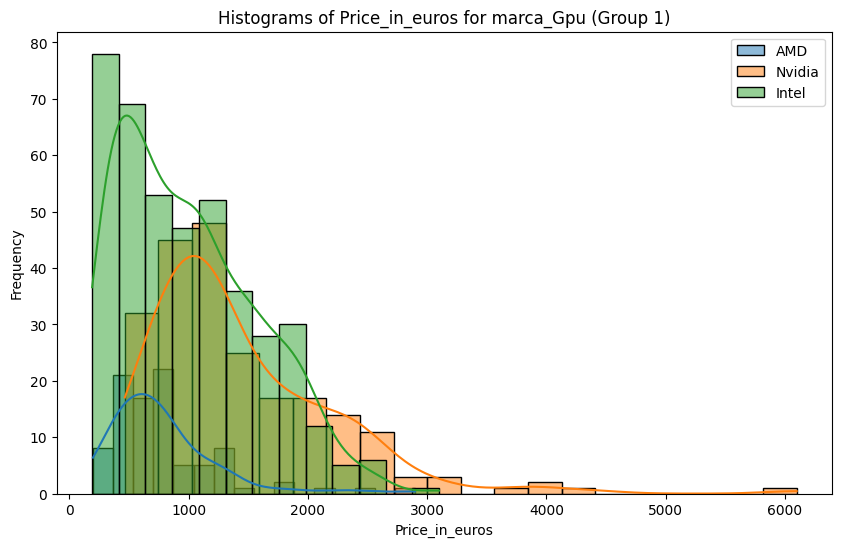

In [39]:
# categóricas vs target

for col in features_cat:
    bt.plot_grouped_histograms(train_set, cat_col= col, num_col= target, group_size= train_set[target].nunique())

Me quedo con todas.

In [40]:
columnas = [col for col in features_num]
columnas.append(target)

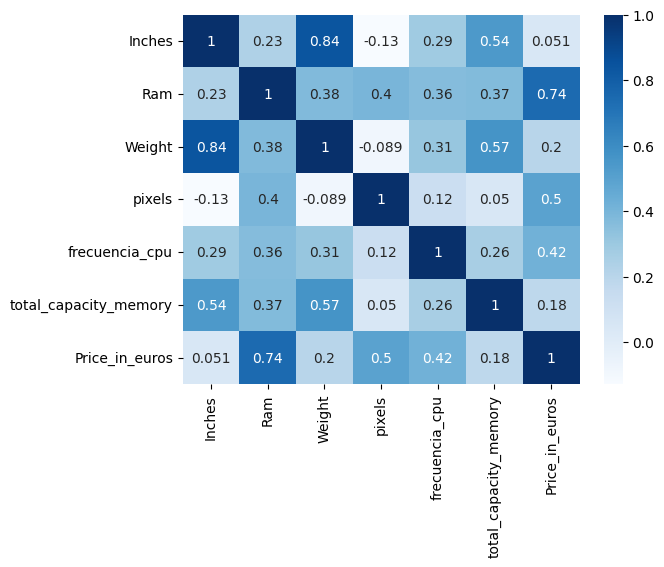

In [41]:
# Target vs numéricas
sns.heatmap(train_set[columnas].corr(), annot = True, cmap = "Blues");

- Inches apenas correla con el target y presenta una alta colinealidad con Weight, así que la descarto.
- Ram es la que mayor correlación tiene con el target.

In [42]:
features_num = [col for col in features_num if col != "Inches"]
features_num

['Ram', 'Weight', 'pixels', 'frecuencia_cpu', 'total_capacity_memory']

In [43]:
features = features_cat + features_num
print(features)

['Company', 'TypeName', 'OpSys', 'touchscreen', 'IPS_panel', 'familias_cpu', 'SSD', 'HDD', 'Flash_storage', 'Hybrid', 'marca_Gpu', 'Ram', 'Weight', 'pixels', 'frecuencia_cpu', 'total_capacity_memory']


**Tratamiento**

Categóricas

In [44]:
features_cat

['Company',
 'TypeName',
 'OpSys',
 'touchscreen',
 'IPS_panel',
 'familias_cpu',
 'SSD',
 'HDD',
 'Flash_storage',
 'Hybrid',
 'marca_Gpu']

In [45]:
train_set_copy = train_set.copy()
test_set_copy = test_set.copy()

In [46]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
col_cat = ["Company", "TypeName", "OpSys", "familias_cpu", "marca_Gpu"]

train_encod = encoder.fit_transform(train_set[col_cat])
test_encod = encoder.transform(test_set[col_cat])

# Convertimos a DataFrame con nombres de columna
col_names = encoder.get_feature_names_out(col_cat)
train_encod_df = pd.DataFrame(train_encod, columns = col_names, index = train_set.index)
test_encod_df = pd.DataFrame(test_encod, columns = col_names, index = test_set.index)

In [47]:
resto_cols_cat = [col for col in features_cat if col not in col_cat]
resto_cols_cat

['touchscreen', 'IPS_panel', 'SSD', 'HDD', 'Flash_storage', 'Hybrid']

In [48]:
train_set = pd.concat([train_set[features_num + resto_cols_cat + [target]], train_encod_df], axis = 1)
test_set = pd.concat([test_set[features_num + resto_cols_cat + [target]], test_encod_df], axis = 1)

In [49]:
print(train_set.shape)
print(test_set.shape)

(729, 53)
(183, 53)


In [50]:
train_set.head()

,Ram,Weight,pixels,frecuencia_cpu,total_capacity_memory,touchscreen,IPS_panel,SSD,HDD,Flash_storage,...,familias_cpu_E-Series,familias_cpu_FX,familias_cpu_Pentium,familias_cpu_Ryzen,familias_cpu_i3,familias_cpu_i5,familias_cpu_i7,marca_Gpu_AMD,marca_Gpu_Intel,marca_Gpu_Nvidia
1118,8,3.00,2.0736,2.6,1000,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
153,16,2.56,2.0736,2.8,512,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
275,8,1.37,4.0960,2.9,512,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1100,4,1.54,2.0736,2.3,500,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
131,16,2.80,2.0736,1.8,2256,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


Numéricas

No necesito ni transformar ni escalar para los modelos que voy a usar.

### 2.4 Dividir X_train, X_test, y_train, y_test

In [54]:
X_train = train_set.drop(columns= target, axis = 1)
y_train = train_set[target]

X_test = test_set.drop(columns= target, axis = 1)
y_test = test_set[target]

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(729, 52)
(729,)
(183, 52)
(183,)


-----------------------------------------------------------------------------------------------------------------

## 4. Modelado

### 4.1 Baseline de modelos


In [ ]:
rf = RandomForestRegressor(max_depth = 5, random_state= 42)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [65]:
valores = cross_val_score(rf, X_train, y_train, cv = 5, scoring = "neg_root_mean_squared_error")
print(-np.mean(valores))

327.352270756798


In [61]:
rf.feature_names_in_

array(['Ram', 'Weight', 'pixels', 'frecuencia_cpu',
       'total_capacity_memory', 'touchscreen', 'IPS_panel', 'SSD', 'HDD',
       'Flash_storage', 'Hybrid', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu',
       'Company_Google', 'Company_HP', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero',
       'Company_Xiaomi', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'OpSys_MacOs', 'OpSys_No OS', 'OpSys_Otro',
       'OpSys_Windows', 'familias_cpu_A-Series', 'familias_cpu_Atom',
       'familias_cpu_Celeron', 'familias_cpu_Core M',
       'familias_cpu_E-Series', 'familias_cpu_FX', 'familias_cpu_Pentium',
       'familias_cpu_Ryzen', 'familias_cpu_i3', 'familias_cpu_i5',
       'familias_cpu_i7', 'marca_Gpu_AMD', 'marc

In [62]:
pd.DataFrame({"features": rf.feature_names_in_, "importance": rf.feature_importances_}).sort_values("importance",ascending = False)

,features,importance
0,Ram,5.714541e-01
31,TypeName_Notebook,1.336670e-01
1,Weight,9.817200e-02
3,frecuencia_cpu,4.422639e-02
47,familias_cpu_i5,2.570562e-02
2,pixels,2.448921e-02
48,familias_cpu_i7,1.778759e-02
33,TypeName_Workstation,1.178503e-02
7,SSD,1.027184e-02
38,familias_cpu_A-Series,1.010170e-02


Ram es la más predictora.

### 4.2 Sacar métricas, valorar los modelos

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [66]:
xgb_reg = XGBRegressor(max_depth = 5, random_state = 42)

In [67]:
valores = cross_val_score(xgb_reg, X_train, y_train, cv = 5, scoring = "neg_root_mean_squared_error")
print(-np.mean(valores))

316.9514091869983


Sale mejor.

### 4.3 Optimización (up to you 🫰🏻)

In [70]:
param_grid_xgb= {
    "n_estimators": [100, 200],
    "learning_rate": [0.1, 0.5, 1],
    "max_depth": [5, 10, 15],
    "colsample_bytree": [0.5, 1],
    "subsample": [0.3, 0.6, 1]
}

xgb_reg = XGBRegressor(verbose = -1)

xgb_grid = GridSearchCV(xgb_reg,
                        param_grid = param_grid_xgb,
                        cv = 5,
                        scoring = "neg_root_mean_squared_error",
                        n_jobs = -1)

xgb_grid.fit(X_train, y_train)

c:\Users\lufue\Desktop\The_Bridge\semptiembre25\bootcamp-data\DS-Online-Lucia-Fuentes\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:31:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBRegressor(...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'colsample_bytree': [0.5, 1], 'learning_rate': [0.1, 0.5, ...], 'max_depth': [5, 10, ...], 'n_estimators': [100, 200], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time

In [69]:
-xgb_grid.best_score_

273.9994445832862

In [71]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 15,
 'n_estimators': 200,
 'subsample': 0.3}

In [72]:
xgb_best = xgb_grid.best_estimator_

In [73]:
y_pred = xgb_best.predict(X_test)
print("RMSE:", root_mean_squared_error(y_test, y_pred))

RMSE: 323.16597672937536


In [74]:
def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()

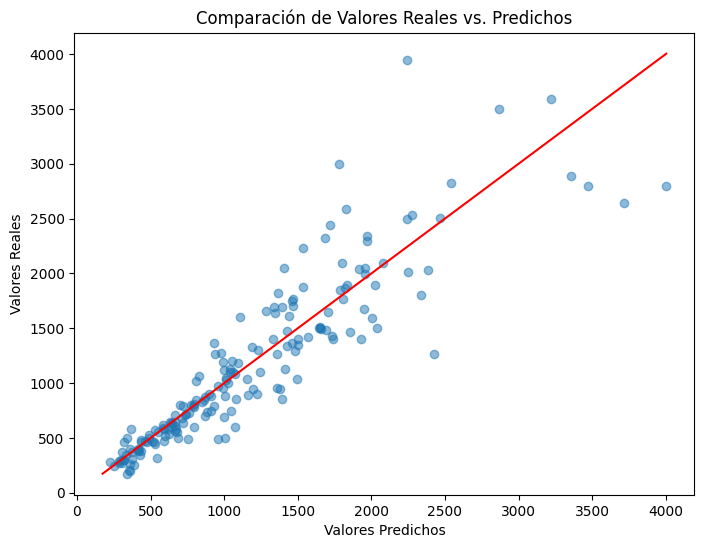

In [75]:
plot_predictions_vs_actual(y_test, y_pred)

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

## 1. Carga los datos de `test.csv` para predecir.


In [93]:
X_pred = pd.read_csv("./data/test.csv", index_col = "laptop_ID")
X_pred.index.name = None
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [77]:
X_pred.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [78]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           391 non-null    object 
 1   Product           391 non-null    object 
 2   TypeName          391 non-null    object 
 3   Inches            391 non-null    float64
 4   ScreenResolution  391 non-null    object 
 5   Cpu               391 non-null    object 
 6   Ram               391 non-null    object 
 7   Memory            391 non-null    object 
 8   Gpu               391 non-null    object 
 9   OpSys             391 non-null    object 
 10  Weight            391 non-null    object 
dtypes: float64(1), object(10)
memory usage: 36.7+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [94]:
X_pred

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg
...,...,...,...,...,...,...,...,...,...,...,...
820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg


In [95]:
X_pred = X_pred.drop(columns= "Product")
X_pred["Ram"] = X_pred["Ram"].str.replace("GB","").astype(int)

X_pred["Weight"] = X_pred["Weight"].str.replace("kg", "").astype(float)

In [96]:
lista_pixeles = []
lista_touchscreen = []
lista_ips_panel = []

for string in X_pred["ScreenResolution"].values:
    ancho, altura = re.findall(r"\d{3,4}", string)
    pixeles = int(ancho)*int(altura) / 1_000_000 # en megapíxeles
    lista_pixeles.append(pixeles)

    lista_touchscreen.append(int(("Touchscreen" in string)))

    lista_ips_panel.append(int(("IPS" in string)))

X_pred["pixels"] = lista_pixeles
X_pred["touchscreen"] = lista_touchscreen
X_pred["IPS_panel"] = lista_ips_panel

In [98]:
familias_cpu = []
frecuencias_cpu = []

for string in X_pred["Cpu"].values:
    string = string.lower()

    frecuencia = float(re.search(r"(\d+(?:\.\d+)?)ghz", string)[1])
    frecuencias_cpu.append(frecuencia)

    if "atom" in string:
      familias_cpu.append("Atom")
    elif "core m" in string:
      familias_cpu.append("Core M")
    elif "celeron" in string:
      familias_cpu.append("Celeron")
    elif "pentium" in string:
      familias_cpu.append("Pentium")
    elif "i3" in string:
      familias_cpu.append("i3")
    elif "i5" in string:
      familias_cpu.append("i5")
    elif "i7" in string:
      familias_cpu.append("i7")
    elif "e-series" in string:
      familias_cpu.append("E-Series")
    elif "fx" in string:
      familias_cpu.append("FX")
    elif "ryzen" in string:
      familias_cpu.append("Ryzen")
    else:
      familias_cpu.append("A-Series")

X_pred["familias_cpu"] = familias_cpu
X_pred["frecuencia_cpu"] = frecuencias_cpu

In [99]:
total_capacity_memory = []
ssd = []
hdd = []
flash = []
hybrid = []

for string in X_pred["Memory"].values:
    string = re.sub(r"(\d+(?:\.\d+)?)TB", tb_a_gb, string) # Primero convierto los terabytes a gigabytes. Si no hay TB lo deja igual
      
    capacities_str = re.findall(r"(\d+(?:\.\d+)?)", string)
    capacities_num = [int(x) for x in capacities_str]
    total_capacity_memory.append(sum(capacities_num))

    string = string.lower()

    ssd.append(int(("ssd" in string)))
      
    hdd.append(int(("hdd" in string)))

    flash.append(int(("flash" in string)))

    hybrid.append(int(("hybrid" in string)))

X_pred["total_capacity_memory"] = total_capacity_memory
X_pred["SSD"] = ssd
X_pred["HDD"] = hdd
X_pred["Flash_storage"] = flash
X_pred["Hybrid"] = hybrid

In [100]:
op_sys = []

for string in X_pred["OpSys"].values:
    string = string.lower()

    if "windows" in string:
      op_sys.append("Windows")
    elif "mac" in string:
      op_sys.append("MacOs")
    elif "no os" in string:
      op_sys.append("No OS")
    else:
      op_sys.append("Otro")

X_pred["OpSys"] = op_sys

In [101]:
marcas_gpu = []

for string in X_pred["Gpu"].values:
    string = string.lower()

    if "intel" in string:
      marcas_gpu.append("Intel")
    elif "amd" in string:
      marcas_gpu.append("AMD")
    else:
      marcas_gpu.append("Nvidia")

X_pred["marca_Gpu"] = marcas_gpu

In [102]:
X_pred = X_pred.drop(columns = columns_to_exclude, axis = 1)

In [103]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company                391 non-null    object 
 1   TypeName               391 non-null    object 
 2   Inches                 391 non-null    float64
 3   Ram                    391 non-null    int32  
 4   OpSys                  391 non-null    object 
 5   Weight                 391 non-null    float64
 6   pixels                 391 non-null    float64
 7   touchscreen            391 non-null    int64  
 8   IPS_panel              391 non-null    int64  
 9   familias_cpu           391 non-null    object 
 10  frecuencia_cpu         391 non-null    float64
 11  total_capacity_memory  391 non-null    int64  
 12  SSD                    391 non-null    int64  
 13  HDD                    391 non-null    int64  
 14  Flash_storage          391 non-null    int64  
 15  Hybrid   

In [105]:
X_pred_encod = encoder.fit_transform(X_pred[col_cat])

# Convertimos a DataFrame con nombres de columna
col_names = encoder.get_feature_names_out(col_cat)
X_pred_encod_df = pd.DataFrame(X_pred_encod, columns = col_names, index = X_pred.index)

In [ ]:
X_pred = pd.concat([X_pred[features_num + resto_cols_cat], X_pred_encod_df], axis = 1)
X_pred

,Ram,Weight,pixels,frecuencia_cpu,total_capacity_memory,touchscreen,IPS_panel,SSD,HDD,Flash_storage,...,familias_cpu_E-Series,familias_cpu_FX,familias_cpu_Pentium,familias_cpu_Ryzen,familias_cpu_i3,familias_cpu_i5,familias_cpu_i7,marca_Gpu_AMD,marca_Gpu_Intel,marca_Gpu_Nvidia
209,16,2.400,2.073600,2.8,512,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1281,4,2.400,1.049088,1.6,500,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1168,4,1.900,1.049088,2.0,1000,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1231,8,2.191,2.073600,2.5,256,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1020,4,1.950,2.073600,2.5,256,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,16,2.900,2.073600,2.8,1512,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
948,4,1.470,2.073600,2.3,128,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
483,8,1.780,2.073600,2.8,256,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1017,4,1.640,1.049088,2.5,500,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [109]:
predictions_submit = xgb_best.predict(X_pred[X_train.columns])
predictions_submit

array([1220.1433 ,  284.2903 ,  398.12585,  832.93115,  893.917  ,
        581.443  ,  507.37918, 1210.5592 , 1100.2974 ,  305.24478,
       2598.8772 , 1206.2949 ,  527.04614, 1670.9215 , 1055.5879 ,
        608.883  , 1776.8506 , 1282.4678 , 1693.4902 ,  691.63715,
       1354.9926 ,  284.33185,  809.0087 , 1059.0847 ,  414.90356,
        731.6667 ,  610.3353 ,  900.61053, 2432.5332 ,  933.9999 ,
       2137.4243 ,  389.20575,  924.5815 , 3014.2605 , 2216.216  ,
       1954.9242 ,  683.0693 , 1364.3679 , 1051.2444 , 1712.9606 ,
        622.5081 ,  738.7363 ,  551.221  , 1142.3784 , 1054.5035 ,
       1106.5989 , 1032.9539 ,  641.57324,  614.50433,  401.36865,
       2192.3577 ,  751.80396, 1182.9893 ,  714.6354 , 1992.2843 ,
       1848.4279 ,  548.5489 ,  862.369  , 1057.7578 ,  663.9471 ,
       2731.8198 , 1819.2672 ,  413.79764, 2104.5122 , 1366.6827 ,
       1482.0905 ,  895.6734 , 1220.0109 , 1628.2358 , 2181.365  ,
        908.3595 ,  616.62476, 1241.4985 , 1394.6838 ,  889.64

## 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`.

In [110]:
sample = pd.read_csv("data/sample_submission.csv")

In [111]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [112]:
sample.shape

(391, 2)

## 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [113]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred.index , "Price_in_euros" : predictions_submit})

In [117]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1220.143311
1,1281,284.290314
2,1168,398.125854
3,1231,832.931152
4,1020,893.916992


In [118]:
submission.shape

(391, 2)

## 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [119]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.

    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.

    Si no, LEE EL MENSAJE Y HAZLE CASO.

    Si aún no:
    - apaga tu ordenador,
    - date una vuelta,
    - enciendelo otra vez,
    - abre este notebook y
    - leelo todo de nuevo.
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                df_to_submit.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")
                img = Image.open("gfg.png")
                img.show()
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [120]:
chequeador(submission)

You're ready to submit!
